In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from sys import path
path.insert(1, 'Trace_Profile')
import TraceModel as tm

In [101]:
import importlib
importlib.reload(tm)

<module 'TraceModel' from 'Trace_Profile/TraceModel.py'>

## Make Order 1 Profile

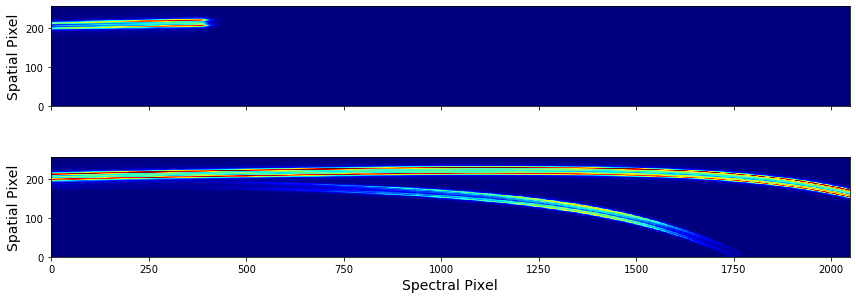

In [98]:
# Open simulated clear and F277W exposures
clear = fits.open('/Users/michaelradica/Documents/School/Ph.D./Research/SOSS/Extraction/simu_F277_CLEAR/clear.fits')[0].data[::-1, :]
F277 = fits.open('/Users/michaelradica/Documents/School/Ph.D./Research/SOSS/Extraction/simu_F277_CLEAR/f277.fits')[0].data[::-1, :]

# Visualize the frames
f, ax = plt.subplots(2, sharex=True, figsize=(12, 5))
ax[0].imshow(F277/np.nanmax(F277), origin='lower', cmap='jet')
ax[0].set_ylabel('Spatial Pixel', fontsize=14)

ax[1].imshow(clear/np.nanmax(clear, axis=0), origin='lower', cmap='jet')
ax[1].set_xlabel('Spectral Pixel', fontsize=14)
ax[1].set_ylabel('Spatial Pixel', fontsize=14)

f.tight_layout()

In [99]:
# The end user would really only need to call this one function which
# then completely creates the trace model for them.
# The above examples were just to demonstrate further how the code actually works.
# The trace model can also be written to disk by passing a file name with the 'filename' argument.
tracemodel_wf277 = tm.makemod(clear, F277, do_plots=False)

204.02852244560313
204.0443219046456
204.04969722819368
204.06677050116073
204.08429435276088
204.11271877887395
204.13947717768363
204.16434698814126
204.19286546713167
204.21567691823583
204.23836116601854
204.26396727734883
204.30058996122108
204.32847099584066
204.3629015144363
204.3788631228905
204.40184034358828
204.42563305650168
204.44853197018804
204.48945135096187
204.51868590541127
204.53699011610254
204.56685740043534
204.59835278557713
204.61999784257424
204.64633140937633
204.6764300165264
204.69272200434528
204.72203420748593
204.7547073718547
204.77556269701853
204.79518891899272
204.86161672795637
204.88793732970078
204.9109765027003
204.935483610068
204.96061827923415
204.97775303577086
205.00278194687598
205.02787496856658
205.04804136647306
205.07197202134327
205.09208700418617
205.1243614172434
205.1630119088406
205.19072554000041
205.21210088439514
205.2391793389335
205.26613846473936
205.28817072137483
205.3123163765827
205.33697885769016
205.3592932570158
205.38

216.4627568727155
216.4589212150744
216.50165154324054
216.56860268241255
215.90545275908983
215.9321304555127
215.96754377649629
216.0125593541877
216.0235498216747
216.00935185152935
216.0638997379769
216.12700539948852
216.1449765652598
216.18290190583554
216.2351115480035
216.2514246970041
216.27078836266722
216.34175724444583
216.37732608982623
216.42741978930857
216.44658354644224
216.49494100624977
216.54460074947423
216.5905514284783
216.66248498809847
216.69335241600731
216.72660608065115
216.76706916158716
216.8402444774698
215.93468277386444
215.99013272104094
215.97806536052306
216.01248955516118
216.10379858623273
216.15412019567324
216.2181528263447
216.24179374278015
216.3046972409356
216.3866121391545
216.4503013076083
216.63434788806254
217.87510776613382
217.81563692533248
216.6271734944662
216.5729346895597
215.52370636700738
215.2429941445175
214.65218192789635
215.68134738460188
215.75420338596223
215.8953218822693
215.99024625609673
217.2479762092891
217.328988931

212.28780558136413
212.26994832234075
212.15073735330017
212.25121237638788
212.1308209795294
212.06812724345716
212.00979303716252
211.9223590684887
211.92486674720973
211.90646516890416
211.8238776181724
211.7442540066602
211.6595826902895
211.68565306184104
211.63430343038658
211.59381166540788
211.5092066549849
211.48439703746493
211.41913597757576
211.3616910330796
211.30691400927904
211.241222991141
211.15421428144586
211.12089355265886
211.16204162235385
211.04928969831846
210.99637196749651
210.92218401735389
210.85072643947467
210.80066240984848
210.82907876132563
210.7272563761077
210.67333258459877
210.6043113969668
210.543185742075
210.5170715489588
210.43560981216442
210.37146187884488
210.38788689317903
210.2960227249857
210.23696300098436
210.17373948938896
210.10813189212715
210.03804230214718
210.01702469207441
209.93852112305808
209.87912300200358
209.8221959743458
209.77929881935344
209.70383691766799
209.6669531474333
209.57535834316647
209.509391280334
209.50286646

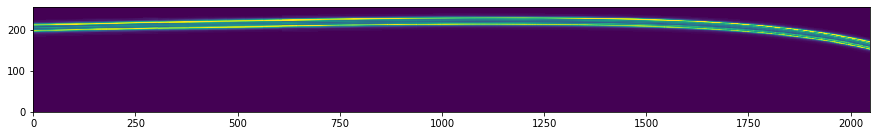

In [100]:
# Visualize the new model.
plt.figure(figsize=(15, 3))
plt.imshow(tracemodel_wf277, origin='lower')

## Make wavelength grid inputs

In [7]:
clear = fits.open('/Users/michaelradica/Documents/School/Ph.D./Research/SOSS/Extraction/simu_F277_CLEAR/clear.fits')[0].data[::-1, :]
stack = fits.open('/Users/michaelradica/Documents/School/Ph.D./Research/SOSS/Extraction/Gaussian_model/InputFiles/CleanStack.fits')[0].data

In [8]:
xOM1, yOM1, tp1 = tm.get_om_centroids(np.arange(2048))
xOM2, yOM2, tp2 = tm.get_om_centroids(np.arange(2048), order=2)
xCV, yCV = tm.get_data_centroids(clear, np.arange(2048))

In [10]:
AA = tm.do_emcee(xOM1, yOM1, xCV, yCV)

flat_samples = AA.get_chain(discard=500, thin=15, flat=True)
ang = np.percentile(flat_samples[:, 0], 50)
xanch = np.percentile(flat_samples[:, 1], 50)
yanch = np.percentile(flat_samples[:, 2], 50)

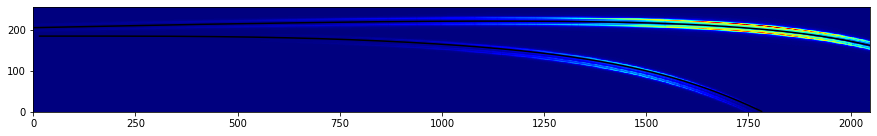

In [46]:
xM1, yM1 = tm.rot_om2det(ang, xanch, yanch, xOM1, yOM1, bound=True)
xM2, yM2 = tm.rot_om2det(ang, xanch, yanch, xOM2, yOM2, order=2, bound=True)

plt.figure(figsize=(15,3))
plt.imshow(clear, origin='lower', cmap='jet')
plt.plot(xM1, yM1, c='black')
plt.plot(xM2, yM2, c='black')

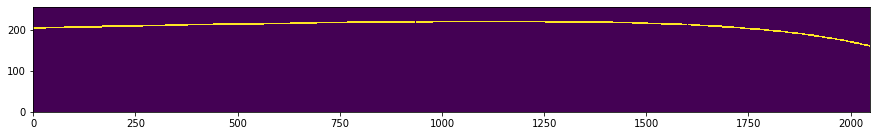

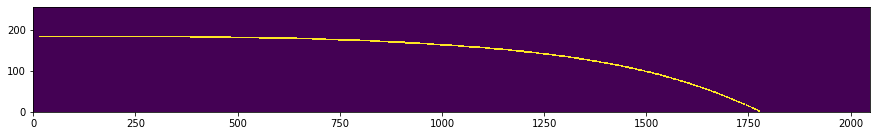

In [49]:
xM1 = xM1.astype(int)
xM2 = xM2.astype(int)
yM1 = yM1.astype(int)
yM2 = yM2.astype(int)

P1, P2 = np.zeros((256, 2048)), np.zeros((256, 2048))
for x, y in zip(xM1, yM1):
    P1[y-2:y+2, x] = 1
for x, y in zip(xM2, yM2):
    P2[y-2:y+2, x] = 1
    
plt.figure(figsize=(15,3))
plt.imshow(P1, origin='lower')

plt.figure(figsize=(15,3))
plt.imshow(P2, origin='lower')

## Extraction

In [50]:
from matplotlib.colors import LogNorm #for better display of FITS images

plt.rc('figure', figsize=(15, 3))

from scipy.interpolate import interp1d
from astropy.convolution import convolve, Box1DKernel

from overlap import TrpzOverlap
from utils import grid_from_map, get_soss_grid, oversample_grid

In [57]:
# Read relevant files
wv_1 = fits.open("Ref_files/wavelengths_m1.fits")[0].data
wv_2 = fits.open("Ref_files/wavelengths_m2.fits")[0].data
T1 = tracemodel_wf277  # fits.open("Ref_files/trace_profile_m1.fits")[0].data.squeeze()
T2 = fits.open("Ref_files/trace_profile_m2.fits")[0].data.squeeze()

# Convert to float (fits precision is 1e-8)
wv_1 = wv_1.astype(float)
wv_2 = wv_2.astype(float)
T1 = T1.astype(float)
T2 = T2.astype(float)

In [59]:
# Normalised spatial profile
Pp1 = T1 / T1.sum(axis=0)
Pp1[np.isnan(Pp1)] = 0.

Pp2 = T2 / T2.sum(axis=0)
Pp2[np.isnan(Pp2)] = 0.
Pp2 = Pp2[::-1, :]

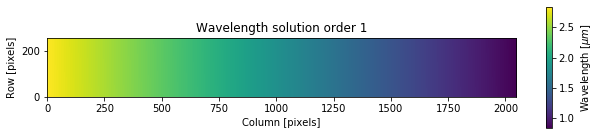

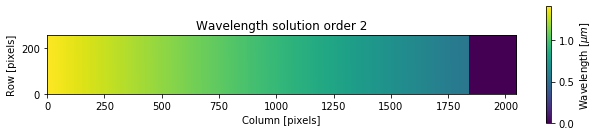

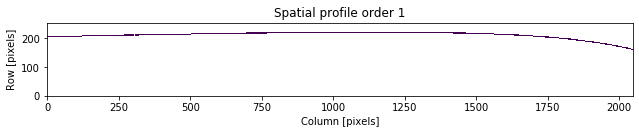

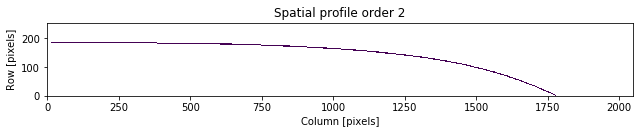

In [55]:
plt.figure(figsize=(9,2))
plt.title("Wavelength solution order 1")
plt.imshow(wv_1, origin='lower')
cmap = plt.colorbar(label="Wavelength [$\mu m$]")
plt.ylabel('Row [pixels]')
plt.xlabel('Column [pixels]')
plt.tight_layout()

plt.figure(figsize=(9,2))
plt.title("Wavelength solution order 2")
plt.imshow(wv_2, origin='lower')
cmap = plt.colorbar(label="Wavelength [$\mu m$]")
plt.ylabel('Row [pixels]')
plt.xlabel('Column [pixels]')
plt.tight_layout()

plt.figure(figsize=(9,2))
plt.title("Spatial profile order 1")
plt.imshow(np.ma.array(P1, mask=P1<0.00001), norm=LogNorm(), origin='lower')
#cmap = plt.colorbar(label="Profile")
plt.ylabel('Row [pixels]')
plt.xlabel('Column [pixels]')
plt.tight_layout()

plt.figure(figsize=(9,2))
plt.title("Spatial profile order 2")
plt.imshow(np.ma.array(P2, mask=(P2<0.00001)|(wv_2==0)), norm=LogNorm(), origin='lower')
#cmap = plt.colorbar(label="Profile")
plt.ylabel('Row [pixels]')
plt.xlabel('Column [pixels]')
plt.tight_layout()

In [56]:
lam_simu = get_soss_grid([P1, P2], [wv_1, wv_2], n_os=1)
# This basically just gets the wavelength at the trace CoM in each column.
# The second order is preferred in wvelength region where the two overlap due to higher spectral resolution.

In [60]:
# Choose a small threshold for the spatial profile cut
# (less than for a normal extraction)
simu_O1 = TrpzOverlap([Pp1], [wv_1], orders=[0], lam_grid=lam_simu, thresh=1e-11, c_kwargs={'thresh':1e-5})
simu = TrpzOverlap([Pp1, Pp2], [wv_1, wv_2], lam_grid=lam_simu, thresh=1e-11, c_kwargs={'thresh':1e-5})
# This is the class that will actually do the extraction by solving the likelihood equation (11 in document)

# ***** WARNING *******
# Since it's oversampled, may take some time to initiate
# (mostly because of the convolution matrix)

create test dataset - inject sinusoid

In [61]:
# Generate flux to inject
flux = 1 + 0.5 * np.sin(lam_simu*500)
# Multiplication by a fudge factor to get
# a realistic number of counts on the detector
flux *= 1e12
# flux *= 1e9

# Inject (`rebuild` could also take a callable` input.)
scidata = simu.rebuild(flux)
scidata[np.isnan(scidata)] = 0.

scidata_O1 = simu_O1.rebuild(flux, orders=[0])
scidata_O1[np.isnan(scidata_O1)] = 0.
# rebuild just calculates the matrix coefs (b_n, equ 1-3 in document) and multiplies 
# them by the input flux to reconstruct the model detector image.

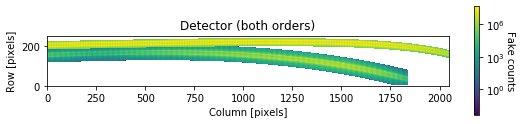

In [62]:
plt.figure(figsize=(9,2))
plt.imshow(scidata, norm=LogNorm(), origin='lower')
cmap = plt.colorbar()
plt.title('Detector (both orders)')
plt.ylabel('Row [pixels]')
plt.xlabel('Column [pixels]')
cmap.set_label('Fake counts', rotation=270, labelpad=10)

extract first order only

In [67]:
lam_grid = get_soss_grid([P1, P2], [wv_1, wv_2], n_os=1)

extra = TrpzOverlap([Pp1], [wv_1], orders=[0], scidata=scidata, lam_grid=lam_grid, thresh=1e-9,
                    c_kwargs={'thresh':0.0001})

In [68]:
f_k = extra.extract()
rebuilt = extra.rebuild(f_k)

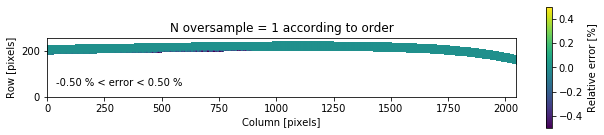

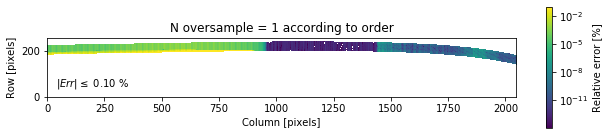

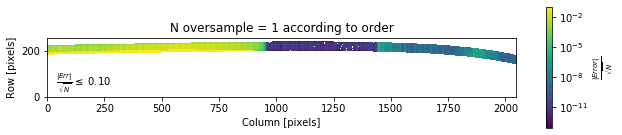

In [69]:
# Look at errors
n_oversample=1
plt.figure(figsize=(9,2))
plt.title("N oversample = {} according to order".format(n_oversample))
plt.imshow((rebuilt-scidata)/scidata * 100, origin='lower', vmin=-0.5, vmax=0.5)
cmap = plt.colorbar(label="Relative error [%]")
plt.text(40,46, "{:.2f} % < error < {:.2f} %".format(cmap.vmin, cmap.vmax))
plt.ylabel('Row [pixels]')
plt.xlabel('Column [pixels]')
plt.tight_layout()

plt.figure(figsize=(9,2))
plt.title("N oversample = {} according to order".format(n_oversample))
plt.imshow(np.abs(rebuilt-scidata)/scidata * 100, norm=LogNorm(), origin='lower', vmax=1e-1)
cmap = plt.colorbar(label="Relative error [%]")
plt.text(40,46, r"$| Err | \leq$" + " {:.2f} %".format(cmap.vmax))
plt.ylabel('Row [pixels]')
plt.xlabel('Column [pixels]')
plt.tight_layout()

plt.figure(figsize=(9,2))
plt.title("N oversample = {} according to order".format(n_oversample))
plt.imshow(np.abs(rebuilt-scidata)/np.sqrt(scidata),norm=LogNorm(), origin='lower', vmax=1e-1)
cmap = plt.colorbar(label=r"$\frac{| Error |}{\sqrt{N}}$")
plt.text(40,46, r"$\frac{|Err|}{\sqrt{N}} \leq$" + " {:.2f}".format(cmap.vmax))
plt.ylabel('Row [pixels]')
plt.xlabel('Column [pixels]')
plt.tight_layout()

## Extract order 2

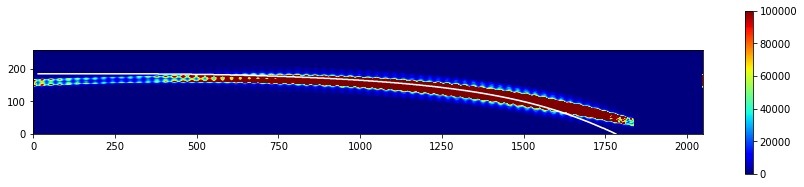

In [74]:
scidata[np.isnan(scidata)] = 0.
rebuilt[np.isnan(rebuilt)] = 0.

plt.figure(figsize=(15, 3))
plt.imshow(np.abs(rebuilt-scidata), origin='lower', vmax=1e5, cmap='jet')
#plt.plot(aa[0][:1832], aa[1][:1832], c='red')
#plt.plot(xOM, yOM, c='blue')
plt.plot(xM2, yM2, c='white')
plt.colorbar()

In [38]:
AA = clear[0:200, 500:1700]/np.nanmax(clear[0:200, 500:1700], axis=0)
AA[150:, 1000:] = 0
AA = AA / np.nanmax(AA, axis=0)

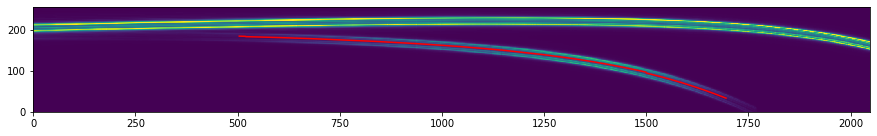

In [110]:
plt.figure(figsize=(15,3))
plt.imshow(clear/np.nanmax(clear, axis=0), origin='lower')
#plt.imshow(AA, origin='lower')
plt.plot(aa[0]+500, aa[1], c='red')
#plt.plot(xOM, yOM, c='blue')

In [39]:
aa = tm.get_data_centroids(AA, atthesex=np.arange(1200))

In [43]:
xOM, yOM, tp2 = get_om_centroids(atthesex=np.linspace(0, 2047, 2048))  # OM

In [82]:
stack = fits.open('/Users/michaelradica/Documents/School/Ph.D./Research/SOSS/Extraction/Gaussian_model/InputFiles/CleanStack.fits')[0].data

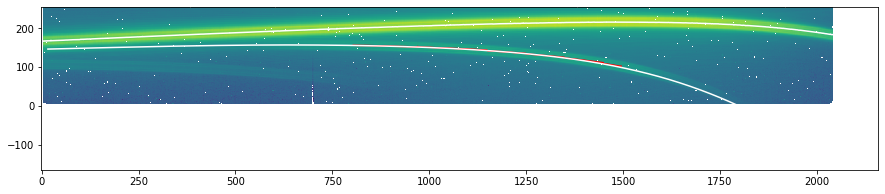

In [145]:
plt.figure(figsize=(15,3))
plt.imshow(np.log10(stack), origin='lower')
plt.plot(ss[0]+800, ss[1], c='red')
#plt.plot(xOM, yOM, c='blue')
plt.plot(EE[0], EE[1], c='white')
plt.plot(CC[0], CC[1], c='white')


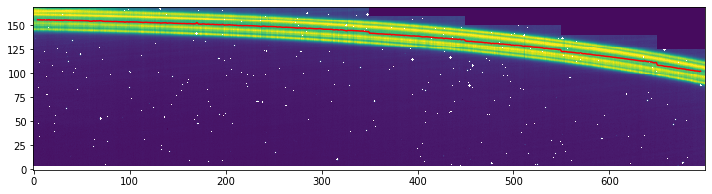

In [79]:
SS = stack[:170,800:1500]
SS[125:,650:] = 0
SS[160:,350:] = 0
SS[150:,450:] = 0
SS[140:,550:] = 0
plt.figure(figsize=(15,3))
plt.imshow(SS/np.nanmax(SS, axis=0), origin='lower')
plt.plot(ss[0], ss[1], c='red')

In [78]:
ss = tm.get_data_centroids(SS, atthesex=np.arange(700))

In [111]:
def log_likelihood(theta, xvals, yvals, xCV, yCV):
    ''' Definition of the log likelihood. Called by do_emcee.
    '''
    ang, orx, ory = theta
    modelx, modely = rot_om2det(ang, orx, ory, xvals, yvals)

    return -0.5 * np.sum(((xCV - modelx[504:1696])**2 + (yCV - modely[504:1696])**2)
                         - 0.5 * np.log(2 * np.pi * 1))


def log_prior(theta):
    ''' Definition of the priors. Called by do_emcee.
    '''
    ang, orx, ory = theta

    if -15 <= ang < 15 and -4048 < orx < 4048 and -456 < ory < 456:
        return -1
    else:
        return -np.inf


def log_probability(theta, xvals, yvals, xCV, yCV):
    ''' Definition of the final probability. Called by do_emcee.
    '''
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf

    return lp + log_likelihood(theta, xvals, yvals, xCV, yCV)

In [86]:
def do_emcee(xOM, yOM, xCV, yCV):
    ''' Utility function which calls the emcee package to preform
    an MCMC determination of the best fitting rotation angle/center to
    map the OM onto the data.

    Parameters
    ----------
    xOM, yOM : array of floats
        X and Y trace centroids respectively in the optics model system,
        for example: returned by get_om_centroids.
    xCV, yCV : array of floats
        X and Y trace centroids determined from the data, for example:
        returned by get_data_centroids.

    Returns
    -------
    sampler : emcee EnsembleSampler object
        MCMC fitting results.
    '''

    # Set up the MCMC run.
    initial = np.array([1, 1577, 215])  # Initial guess parameters
    pos = initial + 0.5*np.random.randn(32, 3)
    nwalkers, ndim = pos.shape

    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability,
                                    args=[xOM, yOM, xCV, yCV])
    # Run the MCMC for 5000 steps - it has generally converged
    # within ~3000 steps in trial runs.
    sampler.run_mcmc(pos, 5000, progress=True)

    return sampler

In [109]:
def rot_om2det(ang, cenx, ceny, xval, yval):
    ''' Utility function to map coordinates in the optics model
    reference frame, onto the detector reference frame, given
    the correct transofmration parameters.

    Parameters
    ----------
    ang : float
        The rotation angle in degrees CCW.
    cenx, ceny : float
        The X and Y pixel values to use as the center of rotation
        in the optics model coordinate system.
    xval, yval : float
        Pixel X and Y values in the optics model coordinate system
        to transform into the detector frame.

    Returns
    -------
    rot_pix[0], rot_pix[1] : float
        xval and yval respectively transformed into the
        detector coordinate system.
    '''

    # Map OM onto detector - the parameters for this transformation
    # are already well known.
    t = 1.8*np.pi / 180
    R = np.array([[np.cos(t), -np.sin(t)], [np.sin(t), np.cos(t)]])
    points1 = np.array([xval - 1347, yval - 141])
    b = R @ points1

    b[0] += 1347
    b[1] += 141

    # Required rotation in the detector frame to match the data.
    t = (ang+0.95)*np.pi / 180
    R = np.array([[np.cos(t), -np.sin(t)], [np.sin(t), np.cos(t)]])

    points1 = np.array([b[0] - cenx, b[1] - ceny])
    rot_pix = R @ points1

    rot_pix[0] += cenx
    rot_pix[1] += ceny

    # inds = [(b2[0]>=0) & (b2[0]<=2047)]

    return rot_pix[0], rot_pix[1]

In [112]:
BB = do_emcee(xOM, yOM, aa[0]+500, aa[1])

100%|██████████| 5000/5000 [00:16<00:00, 304.02it/s]


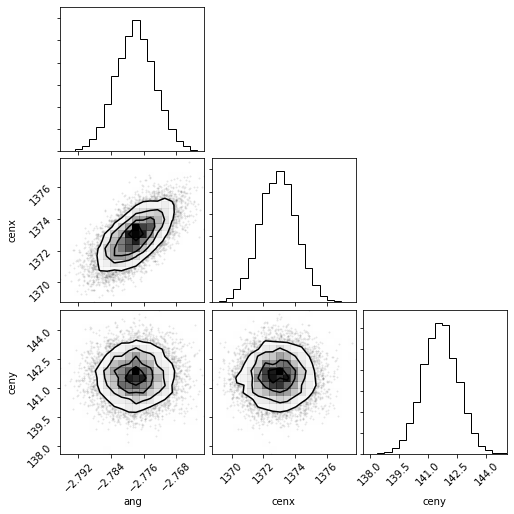

In [113]:
tm.plot_corner(BB)

In [95]:
CC = rot_om2det(0.85, 1347, 141.5, xOM, yOM)

In [114]:
flat_samples = BB.get_chain(discard=500, thin=15, flat=True)
ang = np.percentile(flat_samples[:, 0], 50)
xanch = np.percentile(flat_samples[:, 1], 50)
yanch = np.percentile(flat_samples[:, 2], 50)

In [115]:
ang, xanch, yanch

(-2.7780782152783248, 1372.9259499715, 141.60786859007277)

In [123]:
xOM1, yOM1, tp2 = tm.get_om_centroids(np.arange(2048))

In [144]:
CC = rot_om2det(ang, xanch, yanch, xOM, yOM)

(0, 256)

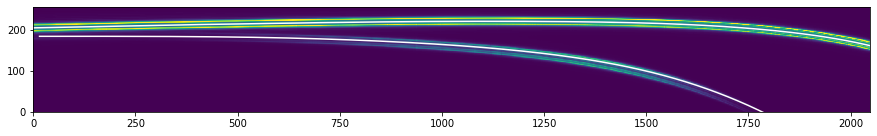

In [139]:
plt.figure(figsize=(15,3))
plt.imshow(clear/np.nanmax(clear, axis=0), origin='lower')
#plt.plot(aa[0]+500, aa[1], c='red')
plt.plot(CC[0], CC[1], c='white')
plt.plot(DD[0], DD[1], c='white')
#plt.plot(EE[0], EE[1], c='white')
plt.ylim(0, 256)

In [135]:
DD = tm.rot_om2det(ang, xanch, yanch, xOM1, yOM1)

In [140]:
EE = tm.get_data_centroids(stack, np.arange(2048))

In [142]:
FF = tm.do_emcee(xOM1, yOM1, EE[0], EE[1])

In [143]:
flat_samples = FF.get_chain(discard=500, thin=15, flat=True)
ang = np.percentile(flat_samples[:, 0], 50)
xanch = np.percentile(flat_samples[:, 1], 50)
yanch = np.percentile(flat_samples[:, 2], 50)
ang, xanch, yanch

(-1.0695248367384076, 850.6298044734453, 237.5258897605446)

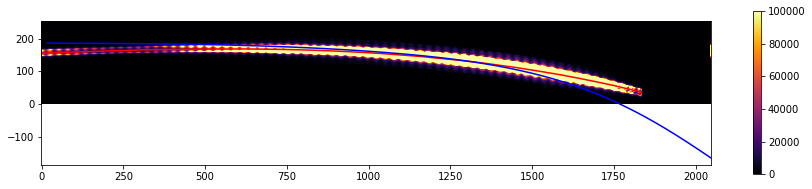

In [80]:
scidata[np.isnan(scidata)] = 0.
rebuilt[np.isnan(rebuilt)] = 0.

plt.figure(figsize=(15, 3))
plt.imshow(np.abs(rebuilt-scidata), origin='lower', vmax=1e5)
plt.plot(aa[0][:1832], aa[1][:1832], c='red')
plt.plot(xOM, yOM, c='blue')
plt.colorbar()

In [32]:
aa = tm.get_data_centroids(np.abs(rebuilt-scidata), atthesex=np.arange(2048))

In [68]:
bb

array([0.01046159, 0.04294047, 0.01522371, ..., 1.64667946, 1.50297184,
       4.19479432])

In [76]:
inds = []
bb = np.abs(np.diff(aa[1]))
for i in range(len(bb)):
    if i == 0:
        continue
    if bb[i] < 3*np.mean(bb):
        inds.append(i)

In [77]:
bbb = np.polyfit(aa[0][inds], aa[1][inds], 8)

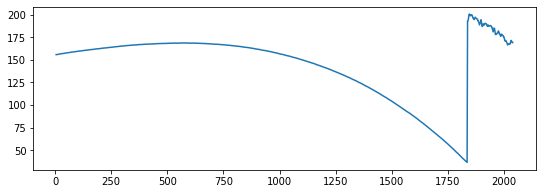

In [79]:
plt.plot(aa[0][inds], aa[1][inds])

In [65]:
aaaa = np.percentile(np.abs(np.diff(aa[1])), 50)
np.where(np.abs(np.diff(aa[1])) > 3*aaaa)

(array([1419, 1425, 1446, 1452, 1459, 1473, 1478, 1484, 1498, 1503, 1509,
        1515, 1522, 1528, 1533, 1539, 1552, 1557, 1563, 1569, 1575, 1581,
        1586, 1591, 1597, 1603, 1608, 1609, 1610, 1611, 1612, 1613, 1614,
        1615, 1616, 1617, 1618, 1619, 1623, 1629, 1632, 1633, 1634, 1635,
        1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646,
        1648, 1654, 1658, 1659, 1660, 1661, 1662, 1663, 1664, 1665, 1666,
        1667, 1668, 1669, 1670, 1671, 1672, 1673, 1674, 1678, 1684, 1685,
        1686, 1687, 1688, 1689, 1690, 1691, 1692, 1693, 1694, 1695, 1696,
        1697, 1698, 1699, 1700, 1701, 1702, 1708, 1710, 1711, 1712, 1713,
        1714, 1715, 1716, 1717, 1718, 1719, 1720, 1721, 1722, 1723, 1724,
        1725, 1726, 1727, 1728, 1729, 1730, 1736, 1737, 1738, 1739, 1740,
        1741, 1742, 1743, 1744, 1745, 1746, 1747, 1748, 1749, 1750, 1751,
        1752, 1753, 1754, 1755, 1756, 1757, 1758, 1762, 1763, 1764, 1765,
        1766, 1767, 1768, 1769, 1770, 

In [53]:
np.mean(np.diff(aa[1]))

0.002345375236150479

(1830, 1834)

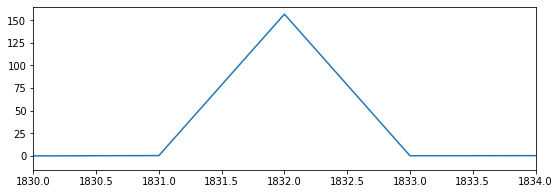

In [50]:
plt.plot(np.diff(aa[1]))
plt.xlim(1830, 1834)

In [40]:
xOM, yOM, tp2 = get_om_centroids(atthesex=np.linspace(0, 2047, 2048))  # OM

In [42]:
import sys
tppath = '/Users/michaelradica/Documents/GitHub/jwst-mtl/SOSS/trace'
sys.path.insert(1, tppath)
import tracepol as tp

def get_om_centroids(atthesex=None):
    ''' Utility function to get order 1 trace profile centroids from the
    JWST NIRISS SOSS optics model.

    Parameters
    ----------
    atthesex : list of floats
        Pixel x values at which to evaluate the centroid position.

    Returns
    -------
    xOM : list of floats
        Optics model x centroid.
    yOM : list of floats
        Optics model y centroids.
    tp2 : list of floats
        trace polynomial coefficients.
    '''

    if atthesex is None:
        atthesex = np.linspace(0, 2047, 2048)

    # Derive the trace polynomials.
    tp2 = tp.get_tracepars(filename='%s/NIRISS_GR700_trace.csv' % tppath)

    # Evaluate the trace polynomials at the desired coordinates.
    w = tp.specpix_to_wavelength(atthesex, tp2, 2, frame='nat')[0]
    xOM, yOM, mas = tp.wavelength_to_pix(w, tp2, 2, frame='nat')

    return xOM, yOM[::-1], tp2

make new second order input trace profile

In [83]:
Pp2[Pp2 == 0] = 0.0001

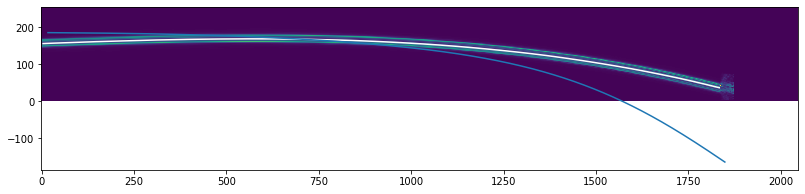

In [129]:
plt.imshow(Pp2, origin='lower')
plt.plot(xCV[:1831], yCV[:1831], c='white')
plt.plot(xOM2, yOM2)

In [110]:
xCV, yCV = tm.get_data_centroids(Pp2, atthesex=np.arange(1850))

In [127]:
xOM2, yOM2, tp2 = tm.get_om_centroids(np.arange(1850), order=2)

In [128]:
xOM2, yOM2

(array([  17.15078912,   18.00983904,   18.86981112, ..., 1846.96129592,
        1847.96136581, 1848.96143936]),
 array([ 185.3647213 ,  185.35855261,  185.35236621, ..., -163.46583986,
        -164.14274226, -164.81983967]))

In [ ]:
for i in range(4:1832):
    I = i - 4  
    Pp2[:, i] - yCV